<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Python for Data Analytics</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>WEEK 4 | PROBLEM SET 4 </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> Blue Ferdinand Alday </font> <br>
    <font color=#FFBF00><b>Due Date:</b> Nov 25, 2023 </font>
   </font> 
    </center>
</h1>
</body>
</html>


<font color=#022851>
<font size="+1">
    <b>Introduction</b> <br><br>
</font>
<font size="+.5">

The dataset found <a href="https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended">here</a> consists of data originally collected for three penguin species found in the Palmer Archipelago supplemented with data regarding diet, life stage, and health stage. The columns and descriptions copied from the URL above are as follows:

    
*  Species: Species of the penguin (Adelie, Chinstrap, Gentoo)
*  Island: Island where the penguin was found (Biscoe, Dream, Torgensen)
*  Sex: Gender of the penguin (Male, Female)
*  Diet: Primary diet of the penguin (Fish, Krill, Squid)
*  Year: Year the data was collected (2021-2025)
*  Life Stage: The life stage of the penguin (Chick, Juvenile, Adult)
*  Body Mass (g): Body mass in grams
*  Bill Length (mm): Bill length in millimeters
*  Bill Depth (mm): Bill depth in millimeters
*  Flipper Length (mm): Flipper length in millimeters
*  Health Metrics: Health status of the penguin (Healthy, Overweight, Underweight)

<br>
</font>
</font>

<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Palmer Penguins</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Objective</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> Blue Ferdinand Alday </font>
   </font> 
    </center>
</h1>
</body>
</html>


The objective of this problem set is to examine species, sex, weight, diet, and island data to gain an understanding of what variables are associated with body mass.
  
### Hypotheses
 * It is hypothesized that independent of the island the penguins were found, the diet eaten will affect the average body mass.
 * It is hypothesized that when the island is considered, the kind of diet eaten will have the same patterns as the first hypothesis. 

<html>
<body> 
<h2 style="background-color: #022851;">
    <br>
    <font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Ingestion</b></font>
    <br>
</h2>
</body>
</html>

In [1]:
import pandas as pd  # for Dataframe
import numpy as np
import matplotlib.pyplot as plt  # for graphical data
import matplotlib.colors as mcolors  # for graphical data
import plotly.express as px


In [2]:
penguins = pd.read_csv(
    "palmerpenguins_extended.csv"
)  # create the penguins DataFrame, check that it loads
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


<html>
<body> 
<h2 style="background-color: #022851;">
    <br>
    <font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Cleaning</b></font>
    <br>
</h2>
</body>
</html>

* The first step in the data cleaning process is to determine what data elements are in the dataset by calling the <b>info method</b> of the dataframe class. The output below shows there are 3430 rows and 11 columns in the penguin dataset.
* The second step is to check nulls and we are interested in the species, island, body_mass_g, sex, diet, and health_metric columns.

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB


In [4]:
# create a subset of penguins capturing columns that may be factors to penguin weight
# sort appropriately to remove any duplicates
body_mass_dataframe = penguins[
    ["species", "island", "sex", "body_mass_g", "diet", "health_metrics"]
]
body_mass_dataframe = body_mass_dataframe.sort_values(
    ["species", "island", "sex", "body_mass_g", "diet", "health_metrics"]
)

print()
print(
    f"Rows of Penguins sex, weight, diet, and health metrics: {len(body_mass_dataframe.index)}"
)

body_mass_dataframe = body_mass_dataframe.drop_duplicates()

print(f"Remaining rows after dropping duplicates: {len(body_mass_dataframe.index)}")

body_mass_dataframe  # Since species, island, sex are aggregate columns (mentioned in the class lecture), its ok


Rows of Penguins sex, weight, diet, and health metrics: 3430
Remaining rows after dropping duplicates: 3326


,species,island,sex,body_mass_g,diet,health_metrics
2680,Adelie,Biscoe,female,2586.0,parental,underweight
1827,Adelie,Biscoe,female,2678.0,parental,underweight
1092,Adelie,Biscoe,female,2688.0,parental,underweight
2695,Adelie,Biscoe,female,2689.0,parental,underweight
2678,Adelie,Biscoe,female,2696.0,parental,underweight
...,...,...,...,...,...,...
1538,Gentoo,Biscoe,male,9734.0,fish,overweight
855,Gentoo,Biscoe,male,10309.0,fish,overweight
273,Gentoo,Biscoe,male,10415.0,fish,overweight
828,Gentoo,Biscoe,male,10425.0,fish,overweight


In [5]:
body_mass_dataframe.isnull().sum()  # check the filtered set does not contain nulls

species           0
island            0
sex               0
body_mass_g       0
diet              0
health_metrics    0
dtype: int64

<html>
<body> 
<h2 style="background-color: #022851;">
    <br>
    <font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Exploratory Data Analysis</b></font>
    <br>
</h2>
</body>
</html>

In [6]:
def generate_bar_graph(
    input_series: object, direction: str, graph_label: str, column_name: str
):
    """Generate either a vertical or horizontal bar graph given a series, direction, title, and column name


    Parameters
    ----------
    input_series: pandas series that will be converted to a list by the function
        dataframe with penguin data
    direction: str
        vertical or horizontal
    graph_label: str
        graph label

    Be sure that the following import statements are declared in your global notebook

    import matplotlib.pyplot as plt # for graphical data
    import matplotlib.colors as mcolors # for graphical data

    Returns
    ----------
    Nothing

    """

    fig, ax = plt.subplots()
    bar_colors = list(mcolors.CSS4_COLORS)
    plot = plt.figure

    target_list = input_series.tolist()
    unique_list = target_list.sort()
    target_counts = [target_list.count(data) for data in target_list]

    if direction.lower() == "vertical":
        ax.bar(target_list, target_counts, label=graph_label, color=bar_colors)
    elif direction.lower() == "horizontal":
        ax.barh(target_list, target_counts, label=graph_label, color=bar_colors)

    ax.set_title(graph_label)
    ax.set_xlabel(column_name.title())
    plt.show()

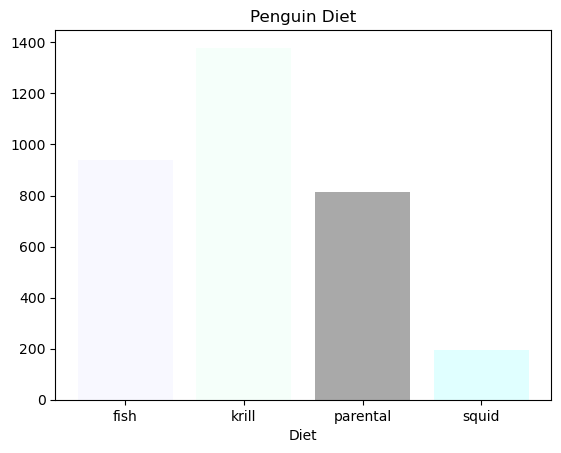

In [7]:
# Distribution of penguins and diet

# Will Average Body weight of parental < krill < squid < fish independent of island be consistent
# across all health_metrics, sex, species

# plt.hist(body_mass_dataframe['diet']) #leave this in case there is a way to specify labels, titles, etc w histograms

generate_bar_graph(
    body_mass_dataframe["diet"], "vertical", "Penguin Diet", "diet"
)  # draw bar graph

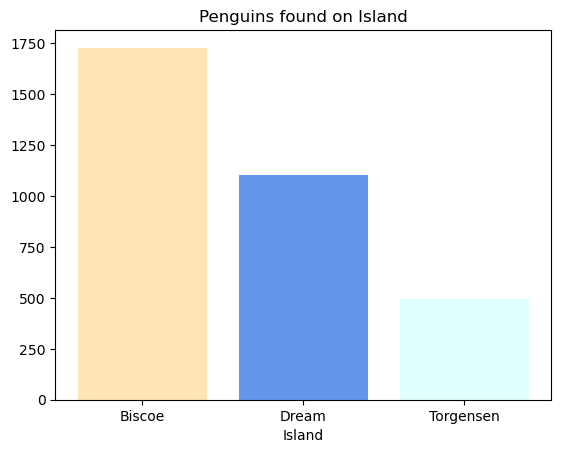

In [8]:
# Distribution of penguins to islands suggest the most penguins are in Biscoe.
# Will this affect the distribution of underweight, healthy, overweight penguins and whether
# Average Body weight of parental < krill < fish < squid will be similar to the general computation above

# plt.hist(body_mass_dataframe['island']) #leave this in case there is a way to specify labels, titles, etc w histograms

generate_bar_graph(
    body_mass_dataframe["island"], "vertical", "Penguins found on Island", "island"
)  # draw bar graph

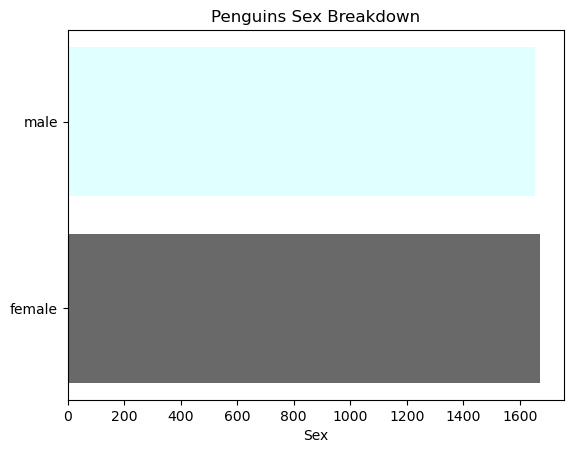

In [9]:
# Distribution of penguins sex suggests a good distribution between the sexes
# plt.hist(body_mass_dataframe['sex']) #leave this in case there is a way to specify labels, titles, etc w histograms

generate_bar_graph(
    body_mass_dataframe["sex"], "horizontal", "Penguins Sex Breakdown", "sex"
)  # draw horizontal graph

In [10]:
def get_avg_given_numeric_column(
    penguin_dataframe: object, numeric_column: str, island: str
) -> object:
    """Return a DataFrame with columns Species, Sex, Weight, Diet, optional Island, and Average

    Average of the data in the numerical column passed in the function

    Uses the built in pandas method DataFrame.query, building the criteria from the arguments in this function

    Parameters
    ----------
    penguin_dataframe: pandas DataFrame
        dataframe with penguin data
    numeric_column: str
        column to calculate the average

    Returns
    ----------
    DataFrame:
        Columns "Species", "Sex", "Weight", "Diet", "Average", optional "Island"

    """

    # retrieve the 3 columns from the DataFrame and store in a new DataFrame,
    # sort the new DataFrame and remove the duplicate rows
    if len(island) > 0:
        subset_dataframe = penguin_dataframe[
            ["species", "sex", "health_metrics", "diet", "island"]
        ]
    else:
        subset_dataframe = penguin_dataframe[
            ["species", "sex", "health_metrics", "diet"]
        ]

    subset_dataframe = subset_dataframe.sort_values(
        ["species", "sex", "health_metrics", "diet"]
    )
    subset_dataframe = subset_dataframe.drop_duplicates()

    # we now have a list of distinct rows to compute averages for

    # Initialize a list of averages
    averages = []

    # go through each row of subset_dataframe to build the criteria for DataFrame.query()
    # then compute the average of numerical_column

    for index, row in subset_dataframe.iterrows():
        # build the expression needed for the dataframe.query statement based on input species, sex, and health_metrics
        expression = "species" + "==" + "'" + row["species"] + "'"
        expression += " & sex" + "==" + "'" + row["sex"] + "'"
        expression += " & health_metrics" + "==" + "'" + row["health_metrics"] + "'"
        expression += " & diet" + "==" + "'" + row["diet"] + "'"

        # if island is passed, put it in the expression
        if len(island) > 0:
            expression += " & island" + "==" + "'" + row["island"] + "'"

        # include the numerical column name in the query expression and store the average into a variable
        average = round(penguin_dataframe.query(expression)[numeric_column].mean(), 2)

        # add the calculated average to a list that will be used for a new column in subset_dataframe
        averages.append(average)

    # create a new colunm Average in subset_dataframe and insert the list of average values in each row

    subset_dataframe["Average"] = averages

    if len(island) > 0:
        # rename column names to match the instructor's example
        subset_dataframe.rename(
            columns={
                "species": "Species",
                "sex": "Sex",
                "health_metrics": "Weight",
                "diet": "Diet",
                "island": "Island",
            },
            inplace=True,
        )

        subset_dataframe = subset_dataframe.sort_values(
            ["Species", "Sex", "Weight", "Island", "Average", "Diet"]
        )

    else:
        subset_dataframe.rename(
            columns={
                "species": "Species",
                "sex": "Sex",
                "health_metrics": "Weight",
                "diet": "Diet",
            },
            inplace=True,
        )

        subset_dataframe = subset_dataframe.sort_values(
            ["Species", "Sex", "Weight", "Average", "Diet"]
        )

    # return dataframe
    return subset_dataframe

In [11]:
# test the hypothesis

# hypothesis 1

numerical_column_average = get_avg_given_numeric_column(
    body_mass_dataframe, "body_mass_g", ""
)
print("Calculate body_mass_g averages")
print()
print(numerical_column_average.head(50))  # dataframe using body mass
print()

# hypotheis 2
numerical_column_average = get_avg_given_numeric_column(
    body_mass_dataframe, "body_mass_g", "Biscoe"
)
print("Calculate body_mass_g averages with islands")
print()
print(numerical_column_average.head(50))  # dataframe using body mass
print()

Calculate body_mass_g averages

        Species     Sex       Weight      Diet  Average
1815     Adelie  female      healthy  parental  3016.28
2643     Adelie  female      healthy     krill  4103.87
2715     Adelie  female      healthy     squid  4439.30
371      Adelie  female      healthy      fish  4481.96
29       Adelie  female   overweight  parental  3299.12
1765     Adelie  female   overweight     krill  4813.13
1105     Adelie  female   overweight     squid  5002.00
1018     Adelie  female   overweight      fish  5285.02
2680     Adelie  female  underweight  parental  2714.56
1050     Adelie  female  underweight     krill  3581.19
46       Adelie  female  underweight     squid  3764.50
2607     Adelie  female  underweight      fish  4020.00
37       Adelie    male      healthy  parental  3583.20
428      Adelie    male      healthy     krill  4994.03
1106     Adelie    male      healthy     squid  5152.05
2622     Adelie    male      healthy      fish  5401.10
1842     Adelie 

In [12]:
# So far, manually looking at the first group of female Adelie underweight/healthy/overweight penguins:
# parental < krill < squid < fish


# Without island: parental < krill < squid < fish IS OK


# Subgrouped by island: parental < krill < squid < fish IS OK

In [17]:

fig = px.line(body_mass_dataframe, x="diet", y="body_mass_g", color="species") # create a line chart
fig.show() # display the chartdf = px.data.iris() # load a sample dataset


<html>
<body> 
<h2 style="background-color: #022851;">
    <br>
    <font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Modeling</b></font>
    <br>
</h2>
</body>
</html>

<html>
<body> 
<h2 style="background-color: #022851;">
    <br>
    <font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Visualization</b></font>
    <br>
</h2>
</body>
</html>

<html>
<body> 
<h2 style="background-color: #022851;">
    <br>
    <font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Results and Recommendations</b></font>
    <br>
</h2>
</body>
</html>